In [1]:
!pip install -q transformers datasets
!pip install pandas scikit-learn

Defaulting to user installation because normal site-packages is not writeable


## ViT

In [97]:
import os
import pandas as pd
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Load labels from CSV file
labels_df = pd.read_csv('JustRAIGS_Train_labels.csv')

# Load image filenames from folder
# image_folder = '/home/vanisha/glaucoma/0'
image_folder = 'crop_partial_data'
image_files = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder)]

# Extract image IDs from filenames
# image_ids = [os.path.splitext(os.path.basename(file))[0] for file in image_files]
image_ids = [os.path.basename(file).split('_')[0] for file in image_files]

# Merge labels with image IDs
data = pd.merge(pd.DataFrame({'image_id': image_ids, 'filename': image_files}), labels_df, on='image_id')

# Split data into train and test sets
# train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Now `train_data` and `test_data` contain image filenames along with corresponding labels
# You can proceed to load images using `sklearn.datasets.load_files` or any other image loading library


In [98]:
data

,image_id,filename,Final Label,Fellow Eye ID,Age,Label G1,Label G2,Label G3,G1 ANRS,G1 ANRI,...,G3 ANRS,G3 ANRI,G3 RNFLDS,G3 RNFLDI,G3 BCLVS,G3 BCLVI,G3 NVT,G3 DH,G3 LD,G3 LC
0,TRAIN006053,crop_partial_data/TRAIN006053_optic_disc.jpg,NRG,TRAIN069418,47.0,NRG,NRG,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TRAIN049372,crop_partial_data/TRAIN049372_optic_disc.jpg,NRG,TRAIN014706,62.0,NRG,NRG,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TRAIN082223,crop_partial_data/TRAIN082223_optic_disc.jpg,NRG,TRAIN053392,55.0,NRG,NRG,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TRAIN083749,crop_partial_data/TRAIN083749_optic_disc.jpg,NRG,NaN,63.0,U,NaN,NRG,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TRAIN003744,crop_partial_data/TRAIN003744_optic_disc.jpg,NRG,TRAIN083851,63.0,NRG,NRG,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36421,TRAIN001115,crop_partial_data/TRAIN001115_optic_disc.jpg,RG,TRAIN067312,52.0,NRG,RG,RG,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36422,TRAIN054146,crop_partial_data/TRAIN054146_optic_disc.jpg,NRG,TRAIN080951,65.0,NRG,NRG,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36423,TRAIN027136,crop_partial_data/TRAIN027136_optic_disc.jpg,NRG,TRAIN076005,58.0,NRG,NRG,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36424,TRAIN040821,crop_partial_data/TRAIN040821_optic_disc.jpg,NRG,TRAIN041969,66.0,NRG,NRG,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
new_data = data[['image_id', 'filename','Final Label']].copy()
new_data

,image_id,filename,Final Label
0,TRAIN006053,crop_partial_data/TRAIN006053_optic_disc.jpg,NRG
1,TRAIN049372,crop_partial_data/TRAIN049372_optic_disc.jpg,NRG
2,TRAIN082223,crop_partial_data/TRAIN082223_optic_disc.jpg,NRG
3,TRAIN083749,crop_partial_data/TRAIN083749_optic_disc.jpg,NRG
4,TRAIN003744,crop_partial_data/TRAIN003744_optic_disc.jpg,NRG
...,...,...,...
36421,TRAIN001115,crop_partial_data/TRAIN001115_optic_disc.jpg,RG
36422,TRAIN054146,crop_partial_data/TRAIN054146_optic_disc.jpg,NRG
36423,TRAIN027136,crop_partial_data/TRAIN027136_optic_disc.jpg,NRG
36424,TRAIN040821,crop_partial_data/TRAIN040821_optic_disc.jpg,NRG


In [100]:
new_data['img'] = None
new_data

,image_id,filename,Final Label,img
0,TRAIN006053,crop_partial_data/TRAIN006053_optic_disc.jpg,NRG,None
1,TRAIN049372,crop_partial_data/TRAIN049372_optic_disc.jpg,NRG,None
2,TRAIN082223,crop_partial_data/TRAIN082223_optic_disc.jpg,NRG,None
3,TRAIN083749,crop_partial_data/TRAIN083749_optic_disc.jpg,NRG,None
4,TRAIN003744,crop_partial_data/TRAIN003744_optic_disc.jpg,NRG,None
...,...,...,...,...
36421,TRAIN001115,crop_partial_data/TRAIN001115_optic_disc.jpg,RG,None
36422,TRAIN054146,crop_partial_data/TRAIN054146_optic_disc.jpg,NRG,None
36423,TRAIN027136,crop_partial_data/TRAIN027136_optic_disc.jpg,NRG,None
36424,TRAIN040821,crop_partial_data/TRAIN040821_optic_disc.jpg,NRG,None


In [101]:
from PIL import Image

In [102]:
for index, row in new_data.iterrows():
    # print(index, row)
    f = new_data.loc[index, 'filename']
    img = Image.open(f)
    new_data.at[index, 'img'] = img

In [103]:
new_data

,image_id,filename,Final Label,img
0,TRAIN006053,crop_partial_data/TRAIN006053_optic_disc.jpg,NRG,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,TRAIN049372,crop_partial_data/TRAIN049372_optic_disc.jpg,NRG,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,TRAIN082223,crop_partial_data/TRAIN082223_optic_disc.jpg,NRG,<PIL.JpegImagePlugin.JpegImageFile image mode=...
3,TRAIN083749,crop_partial_data/TRAIN083749_optic_disc.jpg,NRG,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,TRAIN003744,crop_partial_data/TRAIN003744_optic_disc.jpg,NRG,<PIL.JpegImagePlugin.JpegImageFile image mode=...
...,...,...,...,...
36421,TRAIN001115,crop_partial_data/TRAIN001115_optic_disc.jpg,RG,<PIL.JpegImagePlugin.JpegImageFile image mode=...
36422,TRAIN054146,crop_partial_data/TRAIN054146_optic_disc.jpg,NRG,<PIL.JpegImagePlugin.JpegImageFile image mode=...
36423,TRAIN027136,crop_partial_data/TRAIN027136_optic_disc.jpg,NRG,<PIL.JpegImagePlugin.JpegImageFile image mode=...
36424,TRAIN040821,crop_partial_data/TRAIN040821_optic_disc.jpg,NRG,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [134]:
new_data2 = new_data[['img', 'Final Label']].copy()
new_data2

,img,Final Label
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,NRG
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,NRG
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,NRG
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,NRG
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,NRG
...,...,...
36421,<PIL.JpegImagePlugin.JpegImageFile image mode=...,RG
36422,<PIL.JpegImagePlugin.JpegImageFile image mode=...,NRG
36423,<PIL.JpegImagePlugin.JpegImageFile image mode=...,NRG
36424,<PIL.JpegImagePlugin.JpegImageFile image mode=...,NRG


In [135]:
new_data2.rename(columns={'Final Label': 'label'}, inplace = True)
new_data2

,img,label
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,NRG
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,NRG
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,NRG
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,NRG
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,NRG
...,...,...
36421,<PIL.JpegImagePlugin.JpegImageFile image mode=...,RG
36422,<PIL.JpegImagePlugin.JpegImageFile image mode=...,NRG
36423,<PIL.JpegImagePlugin.JpegImageFile image mode=...,NRG
36424,<PIL.JpegImagePlugin.JpegImageFile image mode=...,NRG


In [136]:
from collections import defaultdict
from datasets import Dataset
  
data = defaultdict(list)
for idx, row in new_data2.iterrows():
    img = new_data2.at[idx, 'img']
    data['img'].append(img)
    data['label'].append(new_data2.at[idx, 'label'])
  
dataset = Dataset.from_dict(data)
# dataset = dataset.filter(lambda example: example['image'] is not None)
# dataset = dataset.filter(lambda example: example['label'] is not None)


In [137]:
from datasets import ClassLabel
features = dataset.features.copy()
features["label"] = ClassLabel(names=["RG", "NRG"])
def adjust_labels(batch):
    batch["label"] = [sentiment for sentiment in batch["label"]]
    return batch
dataset = dataset.map(adjust_labels, batched=True, features=features)

Map:   0%|          | 0/36426 [00:00<?, ? examples/s]

In [138]:
dataset.features

{'img': Image(decode=True, id=None),
 'label': ClassLabel(names=['RG', 'NRG'], id=None)}

In [139]:
splits = dataset.train_test_split(test_size=0.3)
train_ds = splits['train']
test_ds = splits['test']

In [140]:
splits = train_ds.train_test_split(test_size=0.3)
train_ds = splits['train']
val_ds = splits['test']

In [141]:
len(val_ds)

7650

In [142]:
train_ds[0]['label']

1

In [143]:
id2label = {id:label for id, label in enumerate(train_ds.features['label'].names)}
label2id = {label:id for id,label in id2label.items()}
id2label

{0: 'RG', 1: 'NRG'}

In [144]:
id2label[train_ds[0]['label']]

'NRG'

In [145]:
from transformers import ViTImageProcessor

processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

In [146]:
import torch

In [147]:
from torchvision.transforms import (CenterCrop, 
                                    Compose, 
                                    Normalize, 
                                    RandomHorizontalFlip,
                                    RandomResizedCrop, 
                                    Resize, 
                                    ToTensor)

image_mean, image_std = processor.image_mean, processor.image_std
size = processor.size["height"]

normalize = Normalize(mean=image_mean, std=image_std)
_train_transforms = Compose(
        [
            RandomResizedCrop(size),
            RandomHorizontalFlip(),
            ToTensor(),
            normalize,
        ]
    )

_val_transforms = Compose(
        [
            Resize(size),
            CenterCrop(size),
            ToTensor(),
            normalize,
        ]
    )

def train_transforms(examples):
    examples['pixel_values'] = [_train_transforms(image.convert("RGB")) for image in examples['img']]
    return examples

def val_transforms(examples):
    examples['pixel_values'] = [_val_transforms(image.convert("RGB")) for image in examples['img']]
    return examples

In [148]:
train_ds.set_transform(train_transforms)
val_ds.set_transform(val_transforms)
test_ds.set_transform(val_transforms)

In [149]:
train_ds[:2]

{'img': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=498x567 at 0x7C1E3CC7A560>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=561x594 at 0x7C1E500928C0>],
 'label': [1, 1],
 'pixel_values': [tensor([[[ 0.5216,  0.5686,  0.6000,  ...,  0.3569,  0.3255,  0.3333],
           [ 0.5451,  0.5765,  0.6078,  ...,  0.3725,  0.3412,  0.3490],
           [ 0.5529,  0.5843,  0.6078,  ...,  0.3647,  0.3569,  0.3569],
           ...,
           [ 0.2471,  0.2392,  0.2314,  ...,  0.2706,  0.2863,  0.3098],
           [ 0.2314,  0.2314,  0.2549,  ...,  0.2784,  0.2863,  0.3020],
           [ 0.2157,  0.2314,  0.2627,  ...,  0.2863,  0.2941,  0.3020]],
  
          [[-0.0039,  0.0118,  0.0196,  ..., -0.0431, -0.0588, -0.0431],
           [ 0.0118,  0.0196,  0.0196,  ..., -0.0118, -0.0353, -0.0275],
           [ 0.0196,  0.0196,  0.0196,  ..., -0.0118, -0.0196, -0.0196],
           ...,
           [-0.0980, -0.1059, -0.1137,  ..., -0.0824, -0.0667, -0.0431],
           [-0.1137, -

In [150]:
from torch.utils.data import DataLoader
import torch

def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

train_dataloader = DataLoader(train_ds, collate_fn=collate_fn, batch_size=4)

In [151]:
val_dataloader = DataLoader(val_ds, collate_fn=collate_fn, batch_size=4)

In [163]:
test_dataloader = DataLoader(test_ds, collate_fn=collate_fn, batch_size=4)

In [152]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  if isinstance(v, torch.Tensor):
    print(k, v.shape)

pixel_values torch.Size([4, 3, 224, 224])
labels torch.Size([4])


In [153]:
train_ds

Dataset({
    features: ['img', 'label'],
    num_rows: 17848
})

In [154]:
if torch.cuda.is_available():
    print('CUDA is available. Working on GPU')
    DEVICE = torch.device('cuda')
else:
    print('CUDA is not available. Working on CPU')
    DEVICE = torch.device('cpu')

CUDA is available. Working on GPU


In [155]:
from transformers import ViTForImageClassification

model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k',
                                                  id2label=id2label,
                                                  label2id=label2id)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [156]:
import numpy as np
# import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [157]:
from transformers import TrainingArguments, Trainer

# metric_name = "accuracy"

args = TrainingArguments(
    f"glaucoma",
    save_strategy="epoch",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=10,
    per_device_eval_batch_size=4,
    num_train_epochs=10,
    weight_decay=0.01,
    load_best_model_at_end=True,
    # metric_for_best_model=metric_name,
    logging_dir='logs',
    remove_unused_columns=False,
)

In [158]:
from sklearn.metrics import accuracy_score
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return dict(accuracy=accuracy_score(predictions, labels))

In [159]:
def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits, axis=-1, keepdims=True))
    return exp_logits / np.sum(exp_logits, axis=-1, keepdims=True)

In [160]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def compute_metrics(pred):
    # labels = pred.label_ids
    # preds = pred.predictions.argmax(-1)
    predictions, labels = pred
    # print(type(predictions))
    for i in range(len(predictions)):
      predictions[i] = softmax(predictions[i])
    # print(predictions)
    predictions2 = np.argmax(predictions, axis=1)
    # print(predictions)
    predictions = predictions[:,1]
    # print(predictions)
    
    # Calculate accuracy
    accuracy = accuracy_score(predictions2, labels)
   # Calculate precision, recall, and F1-score
    # precision = precision_score(predictions2, labels, average='weighted')
    # recall = recall_score(predictions2, labels, average='weighted')
    # f1 = f1_score(predictions2, labels, average='weighted')
    fpr, tpr, thresholds = roc_curve(labels, predictions)
    # print(predictions)
    # roc_auc = auc(fpr, tpr)
    desired_specificity = 0.95
    idx = np.argmax(fpr >= (1 - desired_specificity))
    # threshold_at_desired_specificity = thresholds[idx]
    sensitivity_at_desired_specificity = tpr[idx]

    # return dict(sensitivity_at_desired_specificity= tpr[idx])
    return dict(
        accuracy=accuracy,
        # precision= precision,
        # recall= recall,
        # f1= f1,
        sensitivity_at_desired_specificity= sensitivity_at_desired_specificity,
    )


In [161]:
import torch

trainer = Trainer(
    model,
    args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    tokenizer=processor,
)

In [225]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Sensitivity At Desired Specificity
1,0.152400,0.116589,0.964159,0.518161
2,0.118200,0.101271,0.968536,0.635074
3,0.101900,0.102791,0.970725,0.567537


TrainOutput(global_step=2559, training_loss=0.11930562295500027, metrics={'train_runtime': 2566.1099, 'train_samples_per_second': 9.969, 'train_steps_per_second': 0.997, 'total_flos': 1.982322586330878e+18, 'train_loss': 0.11930562295500027, 'epoch': 3.0})

## ODR

In [34]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Sensitivity At Desired Specificity
1,0.132600,0.086963,0.974232,0.760284
2,0.096500,0.070806,0.973958,0.867234
3,0.080300,0.075130,0.976700,0.805390


TrainOutput(global_step=2556, training_loss=0.10203577561744129, metrics={'train_runtime': 379.96, 'train_samples_per_second': 67.207, 'train_steps_per_second': 6.727, 'total_flos': 1.9788354467982213e+18, 'train_loss': 0.10203577561744129, 'epoch': 3.0})

In [129]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Sensitivity At Desired Specificity
1,0.097300,0.074508,0.974771,0.753985
2,0.094500,0.088195,0.973856,0.889354
3,0.078100,0.061982,0.978954,0.906917
4,0.059200,0.062032,0.980523,0.931910
5,0.065600,0.062113,0.981438,0.933667


TrainOutput(global_step=8925, training_loss=0.0841994036078787, metrics={'train_runtime': 1324.4092, 'train_samples_per_second': 67.381, 'train_steps_per_second': 6.739, 'total_flos': 6.91538515320619e+18, 'train_loss': 0.0841994036078787, 'epoch': 5.0})

In [162]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Sensitivity At Desired Specificity
1,0.100000,0.073994,0.976209,0.788300
2,0.095700,0.086038,0.973856,0.836396
3,0.078300,0.061115,0.979477,0.906917
4,0.062100,0.076999,0.972941,0.915293
5,0.073200,0.060713,0.980392,0.891516
6,0.063500,0.066631,0.980261,0.895974
7,0.054900,0.084305,0.980261,0.915293
8,0.047100,0.076780,0.981569,0.926236
9,0.057900,0.077262,0.981830,0.917725
10,0.038700,0.080668,0.982092,0.921778


Checkpoint destination directory glaucoma/checkpoint-1785 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory glaucoma/checkpoint-3570 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory glaucoma/checkpoint-5355 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory glaucoma/checkpoint-7140 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory glaucoma/checkpoint-8925 already exists and is non-empty. Saving will proceed but saved results may be invalid.


TrainOutput(global_step=17850, training_loss=0.06960792488076774, metrics={'train_runtime': 3853.6395, 'train_samples_per_second': 46.315, 'train_steps_per_second': 4.632, 'total_flos': 1.383077030641238e+19, 'train_loss': 0.06960792488076774, 'epoch': 10.0})

In [164]:
eval_result = trainer.evaluate(test_ds)
print(eval_result)

{'eval_loss': 0.06492035835981369, 'eval_accuracy': 0.9798682284040996, 'eval_sensitivity_at_desired_specificity': 0.8391674550614948, 'eval_runtime': 60.2957, 'eval_samples_per_second': 181.24, 'eval_steps_per_second': 45.31, 'epoch': 10.0}


In [172]:
model.eval()

all_predictions = []
all_labels = []

for batch_idx, batch_data in enumerate(test_dataloader):
    # Extract inputs from the batch_data
    inputs = batch_data["pixel_values"]
    labels = batch_data["labels"]
    inputs = inputs.to(DEVICE)
    labels = labels.to(DEVICE)
    with torch.no_grad():  # Disable gradient tracking
        outputs = model(inputs)
    all_predictions.append(outputs)
    all_labels.append(labels)



In [175]:
all_labels2 = torch.cat(all_labels, dim=0)

In [187]:
all_predictions2 = all_predictions
for p in all_predictions2:
    for row in p.logits:
        print(row)
    # print(p.logits)
    break
    # print(p.predicted_labels)

TypeError: max() received an invalid combination of arguments - got (keepdims=bool, out=NoneType, axis=int, ), but expected one of:
 * ()
 * (Tensor other)
 * (int dim, bool keepdim)
 * (name dim, bool keepdim)


In [176]:
# print(all_predictions)
print(all_labels2)

tensor([1, 1, 1,  ..., 1, 1, 1], device='cuda:0')


In [166]:
def ensemble_predictions(predictions):
    # Perform ensembling here, for example, you can average the predictions
    return torch.stack(predictions).mean(dim=0)

models = [model, model]
individual_results = []
for model, tokenizer in models:
    result = trainer.evaluate(test_ds)
    individual_results.append(result)

# Ensemble predictions
ensemble_preds = []
for model in models:
    # Generate predictions for each model
    model.eval()
    with torch.no_grad():
        outputs = model(**batch)  # Assuming 'batch' contains your evaluation data
        logits = outputs.logits
        predictions = torch.softmax(logits, dim=-1)
    ensemble_preds.append(predictions)

# Perform ensembling
final_predictions = ensemble_predictions(ensemble_preds)
print(final_predictions)

TypeError: cannot unpack non-iterable ViTForImageClassification object

TRy

In [118]:
import numpy as np
# import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get predicted probabilities 
y_pred_prob = model.predict_proba(X_test)
print(y_pred_prob[0:10])
y_pred_prob = model.predict_proba(X_test)[:,1]
print(y_pred_prob[0:10])
print(y_test[0:10])
# Compute the ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# # Calculate the AUC (Area Under the Curve)
# roc_auc = auc(fpr, tpr)


[[0.35111201 0.64888799]
 [0.13209533 0.86790467]
 [0.52459325 0.47540675]
 [0.14736477 0.85263523]
 [0.04450024 0.95549976]
 [0.94572445 0.05427555]
 [0.78223416 0.21776584]
 [0.17814768 0.82185232]
 [0.25457359 0.74542641]
 [0.61042334 0.38957666]]
[0.64888799 0.86790467 0.47540675 0.85263523 0.95549976 0.05427555
 0.21776584 0.82185232 0.74542641 0.38957666]
[1 1 1 1 1 0 0 1 0 0]


## Ensemble myself

In [89]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Sensitivity At Desired Specificity
1,No log,0.457317,0.952381,0.750000
2,No log,0.362189,0.952381,0.800000
3,No log,0.304111,0.952381,0.500000
4,No log,0.279084,0.952381,0.450000
5,No log,0.272814,0.952381,0.450000


Checkpoint destination directory glaucoma/checkpoint-5 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory glaucoma/checkpoint-10 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory glaucoma/checkpoint-15 already exists and is non-empty. Saving will proceed but saved results may be invalid.


TrainOutput(global_step=25, training_loss=0.4083771896362305, metrics={'train_runtime': 16.4839, 'train_samples_per_second': 14.863, 'train_steps_per_second': 1.517, 'total_flos': 1.898553745557504e+16, 'train_loss': 0.4083771896362305, 'epoch': 5.0})

In [95]:
test_data_loader = DataLoader(test_ds, collate_fn=collate_fn, batch_size=4)

# Set model to evaluation mode
model.eval()

# Placeholder for predictions and ground truth labels
all_predictions = []
all_labels = []

# Iterate over test data
for batch_idx, batch_data in enumerate(test_data_loader):
    # Extract inputs from the batch_data
    inputs = batch_data["pixel_values"]
    labels = batch_data["labels"]
    inputs = inputs.to(DEVICE)
    labels = labels.to(DEVICE)

    # Forward pass to get predictions
    with torch.no_grad():  # Disable gradient tracking
        outputs = model(inputs)

    # Optionally, you may want to apply softmax or other post-processing to your outputs here
    # For example, if you have a softmax layer in your model:
    # predictions = torch.softmax(outputs, dim=1)

    # Append predictions and labels to lists
    all_predictions.append(outputs)
    all_labels.append(labels)

# Convert lists to tensors
# all_predictions = torch.cat(all_predictions, dim=0)
# all_labels = torch.cat(all_labels, dim=0)


In [96]:
print(all_predictions)
print(all_labels)

[ImageClassifierOutput(loss=None, logits=tensor([[-0.7095,  0.9126],
        [-0.6575,  0.8171],
        [-0.3495,  0.6312],
        [-0.6224,  0.8599]], device='cuda:0'), hidden_states=None, attentions=None), ImageClassifierOutput(loss=None, logits=tensor([[-0.6235,  0.7813],
        [-0.6291,  0.8997],
        [-0.6420,  0.8663],
        [-0.5491,  0.6933]], device='cuda:0'), hidden_states=None, attentions=None), ImageClassifierOutput(loss=None, logits=tensor([[-0.5682,  0.9181],
        [-0.5207,  0.9188],
        [-0.6010,  0.7570],
        [-0.5932,  0.9395]], device='cuda:0'), hidden_states=None, attentions=None), ImageClassifierOutput(loss=None, logits=tensor([[-0.6064,  0.8897],
        [-0.6842,  0.9147],
        [-0.5891,  0.8733],
        [-0.5530,  0.9925]], device='cuda:0'), hidden_states=None, attentions=None), ImageClassifierOutput(loss=None, logits=tensor([[-0.5830,  0.8737],
        [-0.6869,  0.7983],
        [-0.6691,  0.8213],
        [-0.6223,  0.8337]], device='cu

## Ensemble

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import densenet121
from efficientnet_pytorch import EfficientNet
from torch.utils.data import DataLoader, Dataset



## Cuda

In [76]:
def training(model, model_name, num_epochs, train_dataloader, val_dataloader):

    loss_function = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.33)

    train_loss_array = []
    train_acc_array = []
    val_loss_array = []
    val_acc_array = []
    lowest_val_loss = np.inf
    best_model = None

    for epoch in tqdm(range(num_epochs)):

        print('Epoch: {} | Learning rate: {}'.format(epoch + 1, scheduler.get_lr()))

        for phase in ['train', 'val']:

            epoch_loss = 0
            epoch_correct_items = 0
            epoch_items = 0

            if phase == 'train':
                model.train()
                with torch.enable_grad():
                    for batch_idx, batch_data in enumerate(train_dataloader):
                        samples = batch_data["pixel_values"]
                        targets = batch_data["labels"]
                        samples = samples.to(DEVICE)
                        targets = targets.to(DEVICE)

                        optimizer.zero_grad()
                        outputs = model(samples)
                        loss = loss_function(outputs, targets)
                        preds = outputs.argmax(dim=1)
                        correct_items = (preds == targets).float().sum()
                        
                        loss.backward()
                        optimizer.step()

                        epoch_loss += loss.item()
                        epoch_correct_items += correct_items.item()
                        epoch_items += len(targets)
                print(epoch_items)

                train_loss_array.append(epoch_loss / epoch_items)
                train_acc_array.append(epoch_correct_items / epoch_items)

                scheduler.step()

            elif phase == 'val':
                model.eval()
                with torch.no_grad():
                    for batch_idx, batch_data in enumerate(val_dataloader):
                        samples = batch_data["pixel_values"]
                        targets = batch_data["labels"]
                        samples = samples.to(DEVICE)
                        targets = targets.to(DEVICE)

                        outputs = model(samples)
                        loss = loss_function(outputs, targets)
                        preds = outputs.argmax(dim=1)
                        correct_items = (preds == targets).float().sum()

                        epoch_loss += loss.item()
                        epoch_correct_items += correct_items.item()
                        epoch_items += len(targets)
                print(epoch_items)

                val_loss_array.append(epoch_loss / epoch_items)
                val_acc_array.append(epoch_correct_items / epoch_items)

                if epoch_loss / epoch_items < lowest_val_loss:
                    lowest_val_loss = epoch_loss / epoch_items
                    torch.save(model.state_dict(), '{}_weights.pth'.format(model_name))
                    best_model = copy.deepcopy(model)
                    print("\t| New lowest val loss for {}: {}".format(model_name, lowest_val_loss))

    return best_model, train_loss_array, train_acc_array, val_loss_array, val_acc_array

In [81]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy
from sklearn.preprocessing import LabelEncoder

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models

In [78]:
import matplotlib.pyplot as plt
def visualize_training_results(train_loss_array,
                               val_loss_array,
                               train_acc_array,
                               val_acc_array,
                               num_epochs,
                               model_name,
                               batch_size):
    fig, axs = plt.subplots(1, 2, figsize=(14,4))
    fig.suptitle("{} training | Batch size: {}".format(model_name, batch_size), fontsize = 16)
    axs[0].plot(list(range(1, num_epochs+1)), train_loss_array, label="train_loss")
    axs[0].plot(list(range(1, num_epochs+1)), val_loss_array, label="val_loss")
    axs[0].legend(loc='best')
    axs[0].set(xlabel='epochs', ylabel='loss')
    axs[1].plot(list(range(1, num_epochs+1)), train_acc_array, label="train_acc")
    axs[1].plot(list(range(1, num_epochs+1)), val_acc_array, label="val_acc")
    axs[1].legend(loc='best')
    axs[1].set(xlabel='epochs', ylabel='accuracy')
    plt.show()

In [79]:
from torchvision import  models
import numpy as np
model_densenet161 = models.densenet161(pretrained=True)
for param in model_densenet161.parameters():
    param.requires_grad = False
model_densenet161.classifier = torch.nn.Linear(model_densenet161.classifier.in_features, out_features=200)
model_densenet161 = model_densenet161.to(DEVICE)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1 | Learning rate: [0.0003]
49
21


 33%|███▎      | 1/3 [00:01<00:02,  1.42s/it]

	| New lowest val loss for DenseNet161: 0.1853597973074232
Epoch: 2 | Learning rate: [0.0003]
49
21


 67%|██████▋   | 2/3 [00:02<00:01,  1.45s/it]

	| New lowest val loss for DenseNet161: 0.07393796972575642
Epoch: 3 | Learning rate: [0.0003]
49
21


100%|██████████| 3/3 [00:04<00:00,  1.42s/it]

	| New lowest val loss for DenseNet161: 0.06492361923058827


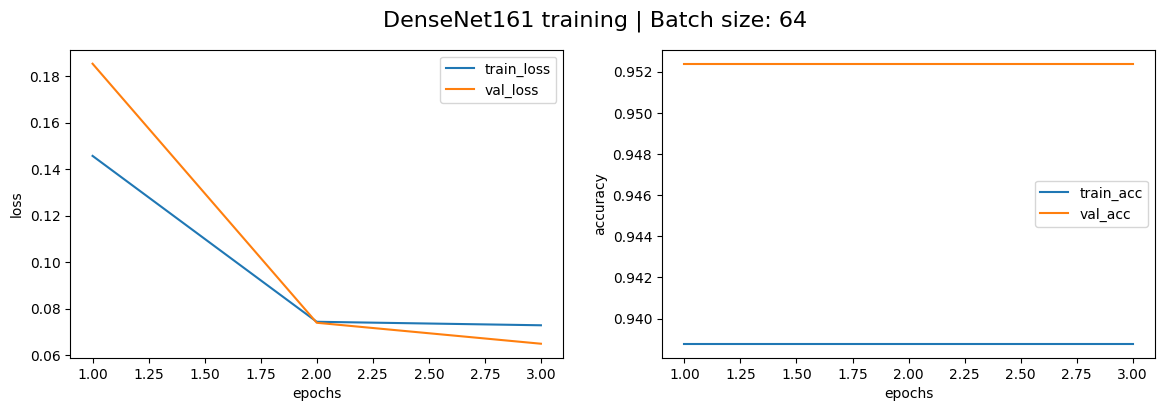


Training results:
	Min val loss 0.0649 was achieved during epoch #3
	Val accuracy during min val loss is 0.9524


In [82]:
densenet161_training_results = training(model=model_densenet161,
                                        model_name='DenseNet161',
                                        num_epochs=3,
                                        train_dataloader=train_dataloader,
                                        val_dataloader=val_dataloader)

model_densenet161, train_loss_array, train_acc_array, val_loss_array, val_acc_array = densenet161_training_results

min_loss = min(val_loss_array)
min_loss_epoch = val_loss_array.index(min_loss)
min_loss_accuracy = val_acc_array[min_loss_epoch]

visualize_training_results(train_loss_array,
                           val_loss_array,
                           train_acc_array,
                           val_acc_array,
                           3,
                           model_name="DenseNet161",
                           batch_size=64)
print("\nTraining results:")
print("\tMin val loss {:.4f} was achieved during epoch #{}".format(min_loss, min_loss_epoch + 1))
print("\tVal accuracy during min val loss is {:.4f}".format(min_loss_accuracy))